## Daten visulaisieren mit Plotnine

In dieser Einheit lernen Sie, wie Sie Datenvisulaisierungen mit dem Python-Modul plotenine erstellen können. Dieses Modul basiert auf dem von Hadley Wickham erstellten Package ggplot2 für die Statistik-Programmiersprache R, welches wiederum auf der "Grammer of Graphics" von Leland Wilkinson basiert.

Zuerst müssen Sie plotnine installieren. Benutzen Sie dazu den "pip package installer":

In [ ]:
pip install plotnine

Für diese Aufgabenserie werden Sie allerdings nicht direkt mit Plotnine arbeiten, sondern mit einem Modul, welches aufgerufene Funktionen, Warnungen und Fehlermeldungen protokolliert. Kopieren Sie die Datei ggplot_log_csv.py in das gleiche Verzeichnis wie dieses Jupyter-Notebook und importieren Sie dann das Modul:

In [1]:
from ggplot_log_csv import *

### Der Datensatz

Im folgenden werden Sie mit dem Datensatz diamonds arbeiten, welcher bereits in plotnine enthalten ist. Dieser enthält Preise und andere Attribute von ca. 54'000 Diamanten. Mit der Funktion head können Sie sich die ersten Zeilen anschauen:


In [2]:
diamonds.head(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Dabei stehen die Spalten für die folgenden Attribute:

- carat: Gewicht des Diamants in Karat (ein Karat entspricht 0.2 Gramm)
- cut: Qualität des Schnitts (Fair, Good, Very Good, Premium, Ideal)
- color: Farbe von J (am schlechtesten) bis D (am besten)
- clarity: Klarheit (I1 (am schlechtesten), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (am besten))
- depth: Tiefe in Prozent
- table: Weite von der Spitze des Daiamats bis zum weitesten Punkt
- price: Preis in US Dollars
- x: Länge in mm
- y: Weite in mm
- z: Tiefe in mm


### Grammer of graphics

Es ist nicht ganz einfach sich in einem Datensatz mit über 50'000 Zeilen zurechtzufinden. Dies gelingt am ehesten mit Kennzahlen wie Mittelwerten oder Standardabweichungen oder graphischen Darstellungen. In diesem Notizbuch soll es vor allem um graphische Darstellungen gehen.

Laut der Grammatik von Hadley Wickham besteht eine Grafik aus dem folgenden Komponenten:

- Datensatz: Hier der Diamanendatensatz
- Ästhetik
- Skala
- Geometrische Objekte
- Statistik
- Facets
- Koordinatensystem

Hier sollen nur die Komponenten Datensatz, Ästethik (kurs: aes) und Geometrische Objekte (kurz: geom) und Statistik betrachtet werden. 


### Geom: Linie oder Punkt

**Beispiel:** Es könnte interessant sein, herauszufinden, ob der Preis vom Gewicht in Karat abhängt.

Dazu muss 

<ol>
<li>ein ggplot-Objekt mit den entsprechenden Ästhetik-Parametern erstellt werden.
Folgene Paramter sind möglich: <ul>
 <li> x: x-Ästethik-Abbildung </li>
 <li> y: y-Ästethik-Abbilung </li>
 <li> color: Farbe </li>
 </ul>
 </li>

<li>diesem ggplot-Objekt ein geometrische Objekt (geom) hinzugefügt werden. Hier soll vorläufig nur geom_line (Linie) betrachtet werden.
</li>
</ol>

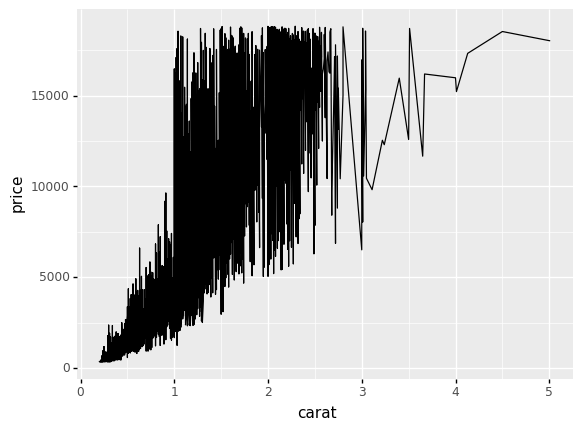

In [4]:
ggplot_objekt = ggplot(diamonds,x="carat",y="price") #Der Datensatz ist diamonds; als x-Variable soll carat verwendet werden, als y-Variable price
ggplot_objekt = ggplot_objekt+geom_line() #Als geometrisches Objekt (geom) soll eine Linie verwendet werden
print(ggplot_objekt) #Gibt die grafische Darstellung aus


Es ist auch möglich, die Farbe der Linie anzupassen:

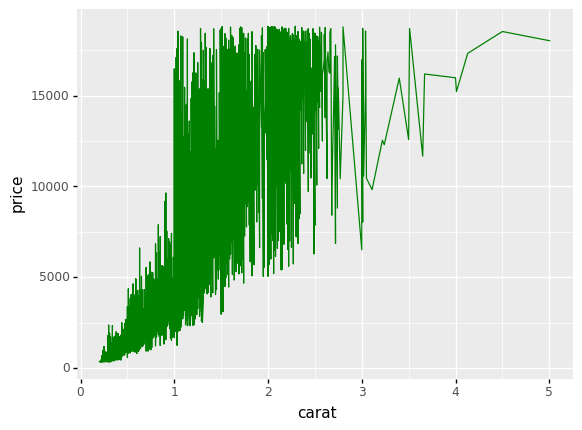

In [14]:
ggplot_objekt = ggplot(diamonds,x="carat",y="price") 
ggplot_objekt = ggplot_objekt+geom_line(color="green") #Passt die Farbe des geoms an.
print(ggplot_objekt) 

Damit der Datensatz ein bisschen übersichtlicher ist, sollen im kommenden nur noch die am wenigsten klaren Diamanten betrachtet werden, d.h. die Daimanten mit der Klarheit (*clarity*) "I1".

In [15]:
diamonds_i1 = diamonds.loc[diamonds["clarity"]=="I1"] #Datensatz mit Namen diamonds_i1, welcher aus den Diamanten mit Klarheit I1 besteht

len(diamonds_i1) # Grösse des Datensatzes (741 Diamanten)

741

Nun soll im Datensatz diamonds_i1 untersucht werden, ob bei diesen ein Zusammenhang zwischen dem Gewicht (carat) und dem Preis (price) besteht.

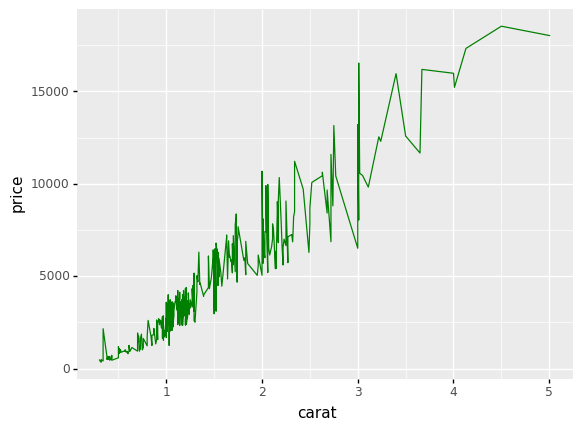

In [16]:
ggplot_objekt = ggplot(diamonds_i1,x="carat",y="price") 
ggplot_objekt = ggplot_objekt+geom_line(color="green") 
print(ggplot_objekt) 

Rein graphisch sehen wir, dass es einen Zusammenhang zwischen Gewicht und Preis zu geben schein - was wohl nicht sonderlich überraschend ist.

Da die Linien wenig Sinn machen, sollen Punkte verwendet werden. Dazu wird geom_point verwendet:

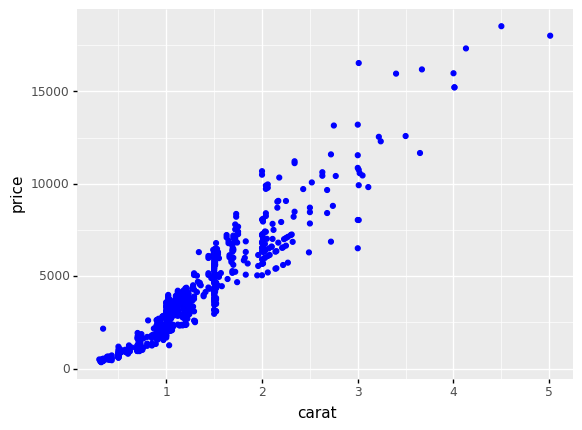

In [8]:
ggplot_objekt = ggplot(diamonds_i1,x="carat",y="price") 
ggplot_objekt = ggplot_objekt+geom_point(color="blue")
print(ggplot_objekt) 

Damit die Tendenz besser erkennbar ist, soll die Regressionsgerade (Gerade, die am "besten" zu den Daten passt) eingeblendet werden. Eine Regressionsgerade gehört zu der Grammatik-Komponente Statistik und kann mit der Funktion stat_linreg hinzugefügt werden.

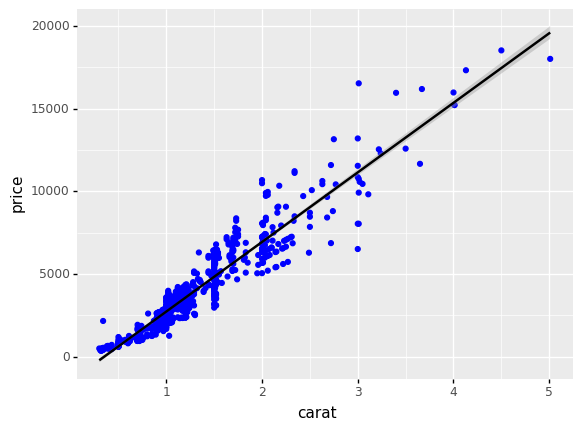

In [17]:
ggplot_objekt = ggplot(diamonds_i1,x="carat",y="price") 
ggplot_objekt = ggplot_objekt+geom_point(color="blue")+stat_linreg()
print(ggplot_objekt) 

**Aufgabe 1:** Untersuchen Sie im Datensatz diamonds_i1, ob es einen Zusammenhang zwischen der depth und dem Preis gibt.

In [10]:
# Hier kommt ihr Code hin.

**Aufgabe 2:** Stellen Sie sich eine ähnliche Aufgabe wie bei Aufgabe 1. 

In [11]:
# Hier kommt ihr Code hin.

**Beispiel:** Nun könnte es auch interessant sei drei Attribute (zum Beispiel Gewicht, Preis und Schnitt) in einem Diagramm darzustellen. Dies ist aber insofern schwierig, als 
- dreidimensionale Darstellungen wenig übersichtlich sind
- das Attribut Farbe keinen Zahlenwert hat

Eine Möglichkeit besteht darin, bei der Ästethik ein drittes Attribut als Farbe (color) zu nehmen.

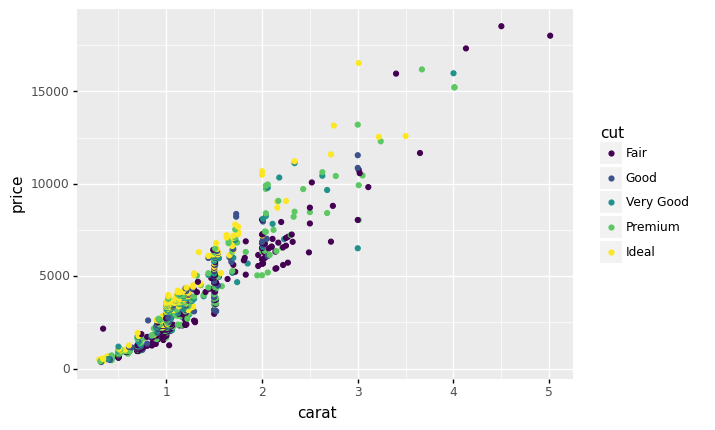

In [19]:
ggplot_objekt = ggplot(diamonds_i1,x="carat",y="price",color="cut") 
ggplot_objekt = ggplot_objekt+geom_point()
print(ggplot_objekt) 

Auch hier können Regressionsgeraden eingezeichnet werden.

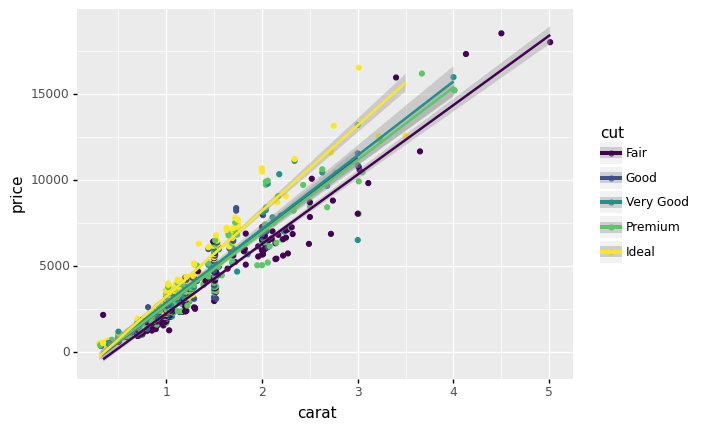

In [20]:
ggplot_objekt = ggplot(diamonds_i1,x="carat",y="price",color="cut") 
ggplot_objekt = ggplot_objekt+geom_point()+stat_linreg()
print(ggplot_objekt) 

**Aufgabe 3:** Welchen Zusammenhang gibt es zwischen depth, table und color? 
Beschränken Sie sich auf den diamonds_i1-Datensatz.

In [21]:
#Hier kommt Ihr Code hin.

### Geom: Balken

Es wird zwischen qunatitativen und kategorialen Daten unterschieden.

**Quantitative Daten** messen etwas oder vergleichen zwei Datenpunkte und zeigen, welcher grösser und welcher kleiner ist. Wenn die Frage "wie viel?" oder "welches ist mehr?" lautet, handelt es sich um quantitative Daten. "carat" oder "price" sind quantitative Daten. So können zum Beispiel zwei Preise in Dollar verglichen werden oder ein Durchschnittspreis berechenet werden.
**Kategoriale Daten** sind Daten die Fragen "von welcher Art?" beantworten. Ein Beispiel ist "cut", die Frage nach einem Mittelwert macht dort wenig Sinn.

Gewisse geometrische Objekte wie Punkte oder Linie sind für kategoriale Daten nicht geeignet (siehe Plot unten). Warum eigentlich nicht?

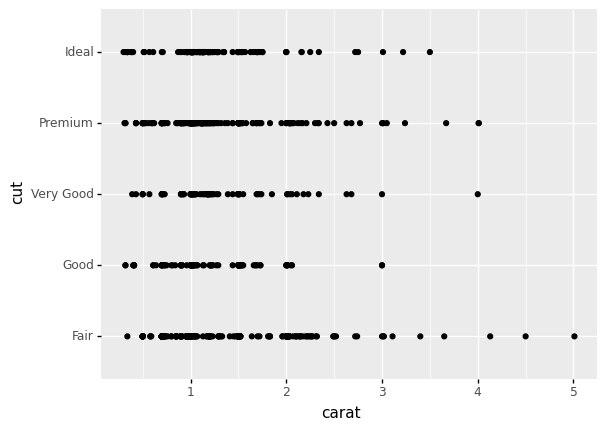

In [22]:
ggplot_objekt = ggplot(diamonds_i1,x="carat",y="cut") 
ggplot_objekt = ggplot_objekt+geom_point()
print(ggplot_objekt) 

Für kategoriale Daten bieten sich zum Beispiel Balken (bar) an.

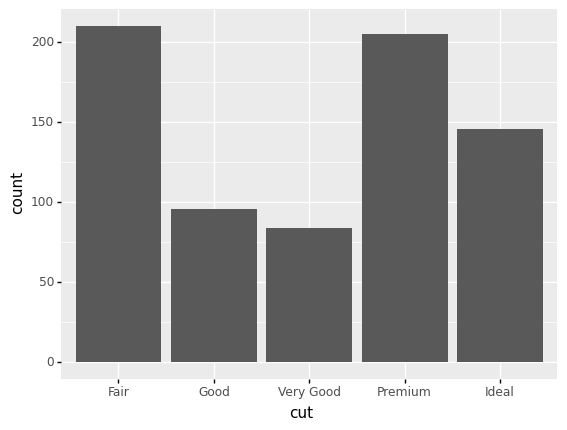

In [23]:
ggplot_objekt = ggplot(diamonds_i1,x="cut") 
ggplot_objekt = ggplot_objekt+geom_bar()
print(ggplot_objekt) 

**Aufgabe 4:** Zeichnen Sie ein Diagramm mit dem Balken als geometrische Objekt des ganzen Datensatz diamonds. Untersuchen Sie das Merkmal Farbe (color)

In [30]:
# Hier kommt ihr Code hin.

**Aufgabe 5:** Überlegen Sie sich eine interessante Fragestellung zum Datensatz diamonds_i1 und beantworten Sie diese mit Hilfe einer geeigneten graphischen Darstellung.

Ihre Fragestellung:

In [ ]:
# Hier kommt ihr Code hin.

Ihre Antwort auf die Fragestellung.